In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import GridSearchCV

In [5]:
# pd.read_csv('loan_prediction.csv')
df =pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df['ApplicantIncome']

0      5849
1      4583
2      3000
3      2583
4      6000
       ... 
609    2900
610    4106
611    8072
612    7583
613    4583
Name: ApplicantIncome, Length: 614, dtype: int64

In [10]:
df[['ApplicantIncome', 'LoanAmount']]

,ApplicantIncome,LoanAmount
0,5849,NaN
1,4583,128.0
2,3000,66.0
3,2583,120.0
4,6000,141.0
...,...,...
609,2900,71.0
610,4106,40.0
611,8072,253.0
612,7583,187.0


In [11]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
# HAndel missing numerical data
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [14]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
# HAndel catagorical missing data
df['Gender'].mode()[0]

'Male'

In [16]:

df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [17]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# data analysis

<Axes: xlabel='Gender', ylabel='Count'>

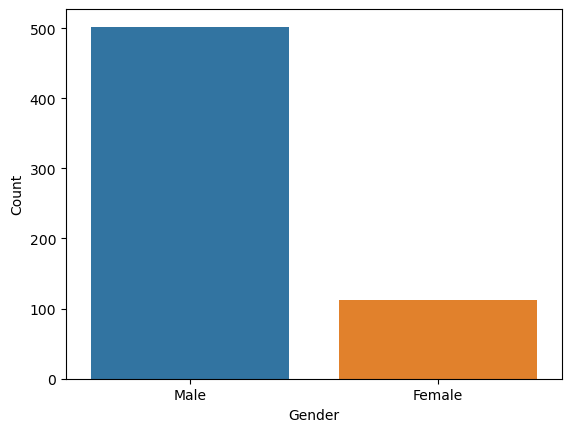

In [18]:
#categorical data
# Count the occurrences of each category in the 'Gender' column
gender_counts = df['Gender'].value_counts()

# Create a dataframe from the gender_counts series
gender_df = pd.DataFrame({'Gender': gender_counts.index, 'Count': gender_counts.values})

# Plot the countplot using the gender_df dataframe
sns.barplot(data=gender_df, x='Gender', y='Count')

<Axes: xlabel='Dependents', ylabel='Count'>

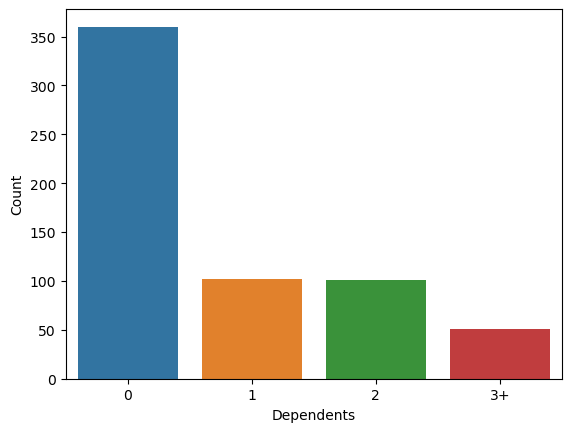

In [19]:
# Count the occurrences of each category in the 'Dependents' column
dependents_counts = df['Dependents'].value_counts()

# Create a dataframe from the dependents_counts series
dependents_df = pd.DataFrame({'Dependents': dependents_counts.index, 'Count': dependents_counts.values})

# Plot the countplot using the dependents_df dataframe
sns.barplot(data=dependents_df, x='Dependents', y='Count')

<Axes: xlabel='Married', ylabel='Counts'>

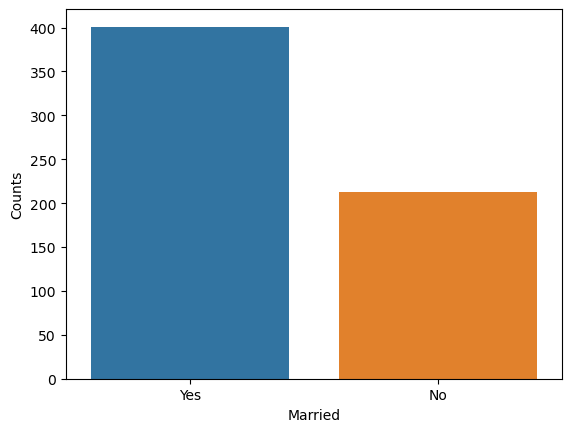

In [20]:


# count for married 
married_count = df['Married'].value_counts()
married_df = pd.DataFrame({'Married':married_count.index, 'Counts':married_count.values})
sns.barplot(data=married_df, x='Married', y='Counts')



In [21]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

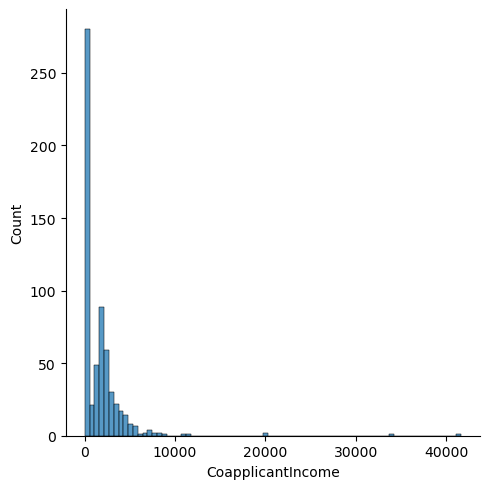

In [22]:


sns.displot(df.CoapplicantIncome)



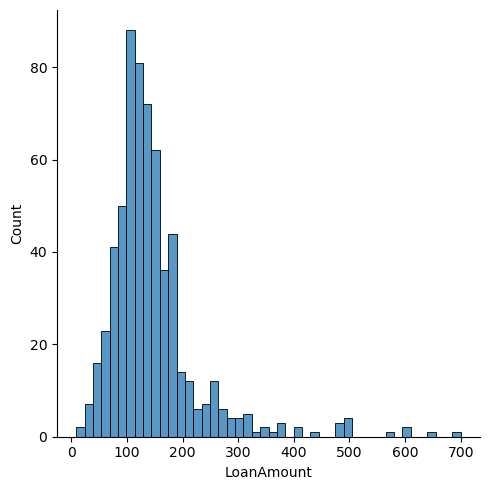

In [23]:
sns.displot(df.LoanAmount)

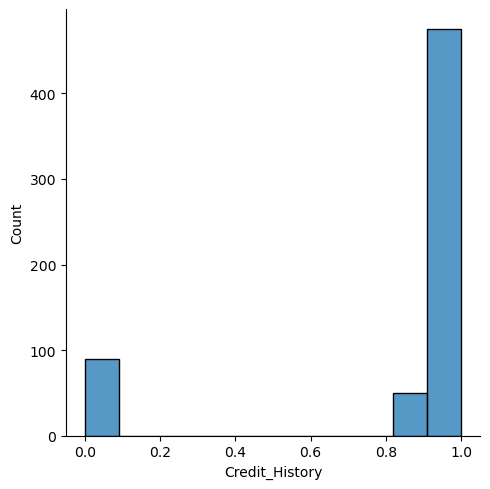

In [24]:
sns.displot(df.Credit_History)

In [25]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [26]:

# Created new column
df['Total_income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [27]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [28]:
# data transformation 

In [29]:
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])

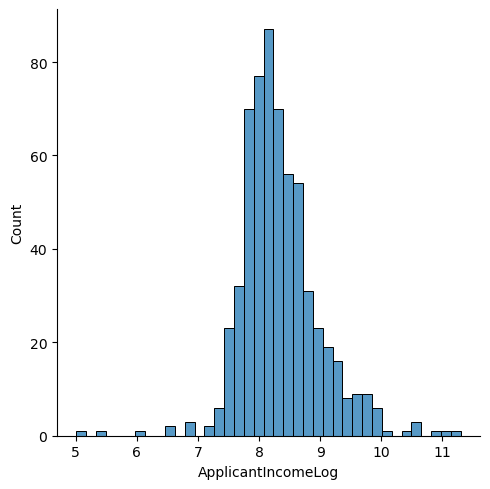

In [30]:
sns.displot(df.ApplicantIncomeLog)

C:\Users\gagan rao\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


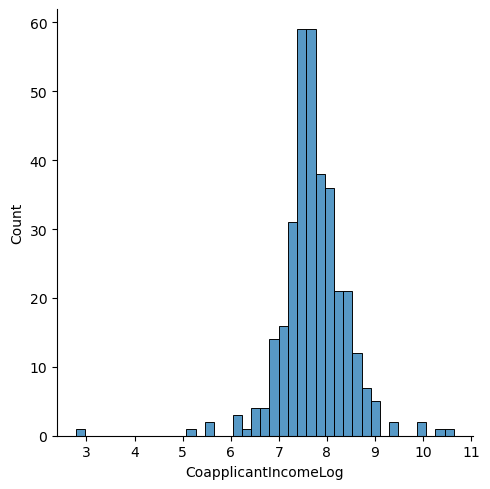

In [31]:


df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome'])
sns.displot(df.CoapplicantIncomeLog)



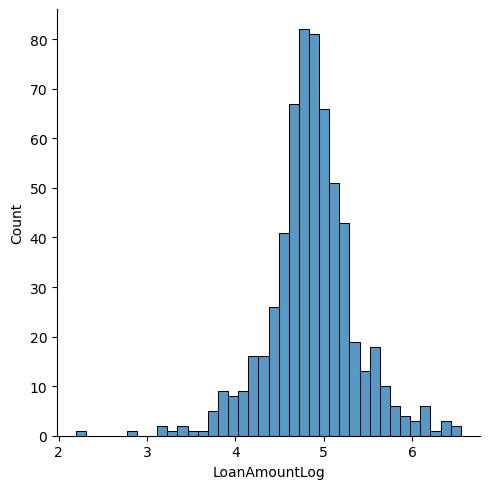

In [32]:


df['LoanAmountLog'] = np.log(df['LoanAmount'])
sns.displot(df.LoanAmountLog)



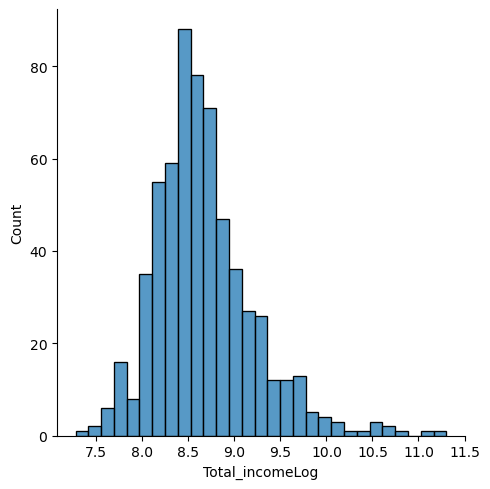

In [33]:
df['Total_incomeLog'] = np.log(df['Total_income'])
sns.displot(df.Total_incomeLog)

In [34]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Total_incomeLog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,-inf,4.986426,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,7.318540,4.852030,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,-inf,4.189655,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,7.765569,4.787492,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,-inf,4.948760,8.699515


In [35]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_income', 'ApplicantIncomeLog', 'CoapplicantIncomeLog',
       'LoanAmountLog', 'Total_incomeLog'],
      dtype='object')

In [37]:
# Droping unwanted columns
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_income', 'Loan_ID', 'CoapplicantIncomeLog' ]
df = df.drop(columns=cols, axis=1)

In [38]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Total_incomeLog
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,8.699515


In [42]:
df.Gender.value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [44]:
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

# Handeling categorical data

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Gender              614 non-null    object 
 1   Married             614 non-null    object 
 2   Dependents          614 non-null    object 
 3   Education           614 non-null    object 
 4   Self_Employed       614 non-null    object 
 5   Credit_History      614 non-null    float64
 6   Property_Area       614 non-null    object 
 7   Loan_Status         614 non-null    object 
 8   ApplicantIncomeLog  614 non-null    float64
 9   LoanAmountLog       614 non-null    float64
 10  Total_incomeLog     614 non-null    float64
dtypes: float64(4), object(7)
memory usage: 52.9+ KB


In [47]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the categorical columns
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents', 'Loan_Status']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [48]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Total_incomeLog
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,8.699515


In [49]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Total_incomeLog
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,0.842199,1.037459,0.687296,8.341213,4.862066,8.669414
std,0.386497,0.476373,1.009623,0.413389,0.340446,0.349681,0.787482,0.463973,0.645263,0.496575,0.545102
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.010635,2.197225,7.273786
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.964677,4.607658,8.334712
50%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,8.246040,4.859812,8.597205
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,8.664750,5.104426,8.925549
max,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,11.302204,6.551080,11.302204


In [50]:
# doing same for another data file

In [52]:
test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')
#Filling missing numricals

test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean())
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mode()[0])

# Filling missing categorical

test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Married'] = test['Married'].fillna(test['Married'].mode()[0])
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed'] = test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])

test['Total_income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

# Apply log transformation to attribute

test['ApplicantIncomeLog'] = np.log(test['ApplicantIncome'])
test['CoapplicantIncomeLog'] = np.log(test['CoapplicantIncome'])
test['LoanAmountLog'] = np.log(test['LoanAmount'])
test['Loan_Amount_Term_Log'] = np.log(test['Loan_Amount_Term'])
test['Total_income_Log'] = np.log(test['Total_income'])

cols = ['ApplicantIncome','CoapplicantIncomeLog', 'LoanAmount', 'Loan_Amount_Term', 'Total_income']
test = test.drop(columns=cols, axis=1)

le= LabelEncoder()

# Encode the categorical columns
cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']
for col in cols:
    test[col] = le.fit_transform(test[col])

C:\Users\gagan rao\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\gagan rao\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [53]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,CoapplicantIncome,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_income_Log
0,LP001015,1,1,0,0,0,0,1.0,2,8.651724,4.700480,5.886104,8.651724
1,LP001022,1,1,1,0,0,1500,1.0,2,8.031385,4.836282,5.886104,8.428581
2,LP001031,1,1,2,0,0,1800,1.0,2,8.517193,5.337538,5.886104,8.824678
3,LP001035,1,1,2,0,0,2546,1.0,2,7.757906,4.605170,5.886104,8.494129
4,LP001051,1,0,0,1,0,0,1.0,2,8.094378,4.356709,5.886104,8.094378


In [55]:
# test and train split

In [56]:
# I/O attributes
x = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [57]:
x

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Total_incomeLog
0,1,0,0,0,0,1.0,2,8.674026,4.986426,8.674026
1,1,1,1,0,0,1.0,0,8.430109,4.852030,8.714568
2,1,1,0,0,1,1.0,2,8.006368,4.189655,8.006368
3,1,1,0,1,0,1.0,2,7.856707,4.787492,8.505323
4,1,0,0,0,0,1.0,2,8.699515,4.948760,8.699515
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,7.972466,4.262680,7.972466
610,1,1,3,0,0,1.0,0,8.320205,3.688879,8.320205
611,1,1,1,0,0,1.0,2,8.996157,5.533389,9.025456
612,1,1,2,0,0,1.0,2,8.933664,5.231109,8.933664


In [58]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [60]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [61]:
x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Total_incomeLog
83,1,1,0,0,0,0.842199,1,8.699515,5.579730,9.017968
90,1,1,0,0,0,1.000000,1,7.992269,4.875197,8.675564
227,1,1,2,0,0,1.000000,1,8.740337,5.347108,8.980298
482,1,1,0,0,0,1.000000,1,7.641564,4.852030,8.562740
464,1,0,0,0,0,0.000000,1,8.334712,4.584967,8.334712


In [62]:
y_train.head()

83     0
90     1
227    1
482    1
464    0
Name: Loan_Status, dtype: int32

In [64]:
# modeltraning 

In [65]:
# logistic regression

In [67]:
# Create an instance of the Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Fit the model to the training data
logreg.fit(x_train, y_train)

# Predict the target variable for the test features
y_pred = logreg.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100)

Accuracy: 78.86178861788618


In [ ]:
#decision tree classifier

In [68]:
# Create an instance of the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
dt_classifier.fit(x_train, y_train)

# Predict the target variable for the test features
y_pred = dt_classifier.predict(x_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100)

Accuracy: 73.17073170731707


In [69]:
# Linear Regression & Polynomial regression

In [70]:
 #Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)
linear_reg_score = linear_reg.score(x_test, y_test)
print("Linear Regression Score:", linear_reg_score * 100)

# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.transform(x_test)

poly_reg = LinearRegression()
poly_reg.fit(x_train_poly, y_train)
poly_reg_score = poly_reg.score(x_test_poly, y_test)
print("Polynomial Regression Score:", poly_reg_score * 100)

Linear Regression Score: 28.403496874066946
Polynomial Regression Score: -1458.1285556527073


In [71]:
#random forest classifier

In [72]:
# Create an instance of the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(x_train, y_train)

# Predict the target variable for the test features
y_pred = rf_classifier.predict(x_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100)

Accuracy: 78.04878048780488


In [73]:
# confusion matrix

Confusion Matrix:
[[20 23]
 [ 4 76]]


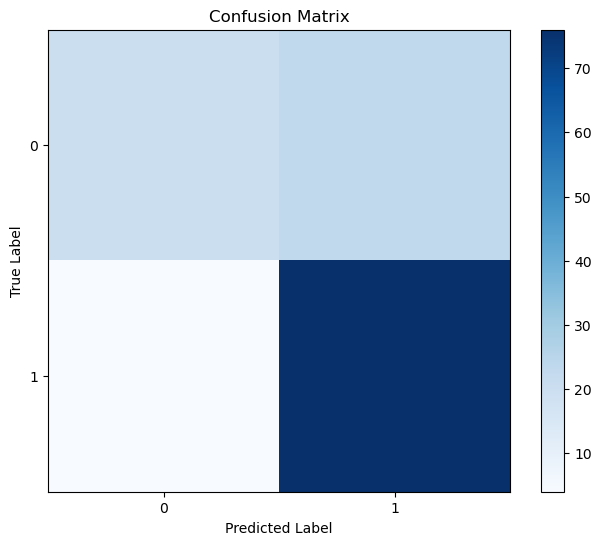

In [74]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()